In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import argmax
from pandas import DataFrame

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.metrics import average_precision_score

from sklearn.model_selection import cross_val_predict

In [3]:
def get_classifier_cv_score(model, X, y, scoring='accuracy', cv=7):
    '''Calculate train and validation score of classifier (model) using cross-validation
        
        
        model (sklearn classifier): Classifier to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        scoring (str): a scoring string accepted by sklearn.metrics.cross_validate()
        cv (int): number of cross-validation folds see sklearn.metrics.cross_validate()
        
        returns: mean training score, mean validation score
    
    '''
    
    scores = cross_validate(model, X, y, cv = 7, scoring = 'average_precision',
                       return_train_score=True)
    
    mean_training = "{:.3f}".format(scores["train_score"].mean())
    
    mean_validation = "{:.3f}".format(scores["test_score"].mean())
    
    
    
    return mean_training, mean_validation

In [4]:
def print_grid_search_result(grid_search):
    '''Prints best parameters and mean training and validation scores of a grid search object.
    
        grid_search (sklearn GridSearchCV): Fitted GridSearchCV object
        
        scores are printed with 3 decimal places.
        
    '''
    print(grid_search.best_params_)
    
    trainScore = "{:.3f}".format(grid_search.cv_results_['mean_train_score'][grid_search.best_index_])
    testScore =  "{:.3f}".format(grid_search.cv_results_['mean_test_score'][grid_search.best_index_])
    print("The Train Score is ", trainScore)
    print("The Test Score is ", testScore)

In [5]:
import mglearn

def plot_grid_search_results(grid_search):
    '''For grids with 2 hyperparameters, create a heatmap plot of test scores
        
        grid_search (sklearn GridSearchCV): Fitted GridSearchCV object
        
        uses mglearn.tools.heatmap() for plotting.
    
    '''
    results = pd.DataFrame(grid_search.cv_results_)

    params = sorted(grid_search.param_grid.keys())
    
    assert len(params) == 2, "We can only plot two parameters."
    
    # second dimension in reshape are rows, needs to be the fast changing parameter
    scores = np.array(results.mean_test_score).reshape(len(grid_search.param_grid[params[0]]),
                                                      len(grid_search.param_grid[params[1]]))

    # plot the mean cross-validation scores
    # x-axis needs to be the fast changing parameter
    mglearn.tools.heatmap(scores, 
                          xlabel=params[1], 
                          xticklabels=grid_search.param_grid[params[1]], 
                          ylabel=params[0], 
                          yticklabels=grid_search.param_grid[params[0]],
                          cmap="viridis", fmt="%0.3f")

In [6]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_actual, y_pred, labels, title=''):
    '''Creates a heatmap plot of the confusion matrix.
    
        y_actual (pandas.DataSeries or numpy.Array): Ground truth label vector
        y_pred (pandas.DataSeries or numpy.Array): Predicted label vector
        labels (list(str)): Class names used for plotting (ticklabels)
        title (str): Plot title
        
        uses sklearn.metrics.confusion_matrix
        
    
    '''
    
    disp = confusion_matrix(y_actual, y_pred, labels = [0,1])
    
    
    df_cm = pd.DataFrame(disp, index=labels, columns=labels)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True,fmt='g')
    plt.title(title)
    
    #TODO: implement function body

## Introduction

![alt text](Data_Information.png "Data Information")

In [7]:
#Loading in our dataset
data_train = pd.read_csv('train.csv')
data_test  = pd.read_csv('test.csv')

In [8]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Cleaning of Data

In [10]:
print('Train columns with null values:\n', data_train.isnull().sum())
print('Test columns with null values:\n', data_test.isnull().sum())

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Test columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


#### Looking at our data we will need to clean some of it as some important columns have null values and some columns we can deem as unimportant for our model.

In [11]:
data_train["Age"].fillna(data_train["Age"].mean(),inplace = True)
data_train["Embarked"].fillna(data_train["Embarked"].mode()[0],inplace=True)

In [12]:
data_test["Fare"].fillna(data_test["Fare"].mean(),inplace = True)
data_test["Age"].fillna(data_test["Age"].mean(),inplace = True)

In [13]:
print('Train columns with null values:\n', data_train.isnull().sum())
print('Test columns with null values:\n', data_test.isnull().sum())

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
Test columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [15]:
#We want to extract the titles from each name because that could prove useful in helping us determine if married people are more likely to survive than single people
data_train["Title"] = data_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
data_test["Title"] = data_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [16]:
data_train["Title"]
pd.crosstab(data_train['Title'], data_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [17]:
for data in [data_train, data_test] :
    data['Title'] = data['Title'].replace(['Lady', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Interesting')
    data['Title'] = data['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royalty')
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')

In [18]:
pd.crosstab(data_test['Title'], data_train['Sex'])

Sex,female,male
Title,,
Interesting,1,5
Master,6,15
Miss,27,52
Mr,95,145
Mrs,31,41


In [19]:
for data in [data_train, data_test]:
    bins = [0,6,13,18,25,35,60, np.inf]
    labels = ["Baby","Child", "Teenager", "Young Adult","Adult","Middle Age", "Elderly"]
    data['AgeGroup'] = pd.cut(data["Age"], bins, labels = labels)

In [20]:
for data in [data_train, data_test]:
    data['FareGroup'] = pd.qcut(data['Fare'], 6, labels = [1, 2, 3, 4, 5,6])

In [21]:
label = LabelEncoder()
for data in [data_train, data_test]:
    data['Sex_Label'] = label.fit_transform(data['Sex'])
    data['Title_Code'] = label.fit_transform(data['Title'])
    data['AgeBin_Code'] = label.fit_transform(data['AgeGroup'])
    data['FareGroup'] = label.fit_transform(data['FareGroup'])


In [22]:
for data in [data_train, data_test]:
    embarked_mapping = {"S": 1, "C": 2, "Q": 3}
    data['Embarked'] = data['Embarked'].map(embarked_mapping)

## Visualization

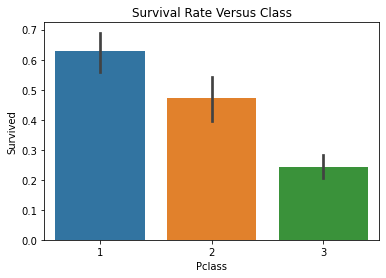

In [23]:
sns.barplot(x="Pclass", y="Survived", data=data_train)
plt.title("Survival Rate Versus Class")
plt.show()

This is an important feature to take note of as being in the first class indicates you had a higher chance of surviving the Titanic.

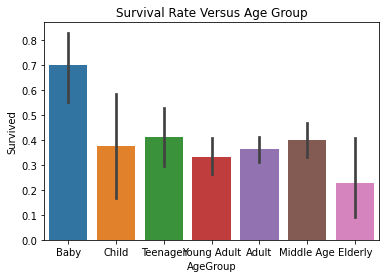

In [24]:
sns.barplot(x="AgeGroup", y="Survived", data=data_train)
plt.title("Survival Rate Versus Age Group")
plt.show()

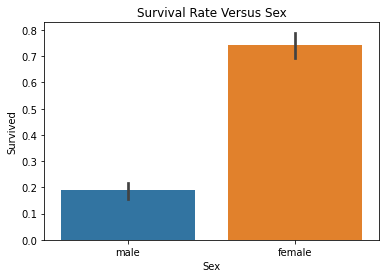

In [25]:
sns.barplot(x="Sex", y="Survived", data=data_train)
plt.title("Survival Rate Versus Sex")
plt.show()

Another Important feature where if you were a female you had over 70% chance of surviving.

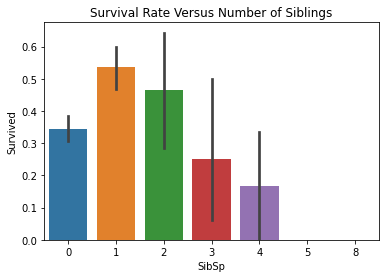

In [26]:
sns.barplot(x="SibSp", y="Survived", data=data_train)
plt.title("Survival Rate Versus Number of Siblings")
plt.show()

We can make the conclusion that if you had a high number of siblings chances are one of them or you wouldn't survive.

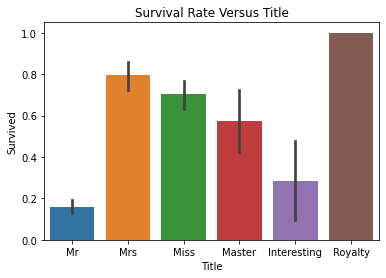

In [27]:
sns.barplot(x="Title", y="Survived", data=data_train)
plt.title("Survival Rate Versus Title")
plt.show()

One thing to indicate if you were a married woman you had a slightly higher chance of surviving than a single woman and also if you were a person with a royalty title you had a 100% chance of surviving.

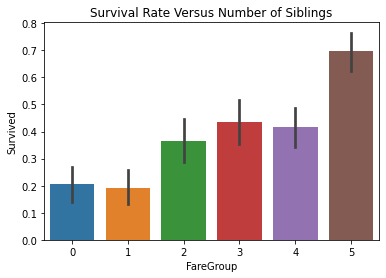

In [28]:
sns.barplot(x="FareGroup", y="Survived", data=data_train)
plt.title("Survival Rate Versus Number of Siblings")
plt.show()

Here your odds of surviving increase if you paid more for your fare, but we can also interpret if you paid more for your fare, you were in the higher economic class.

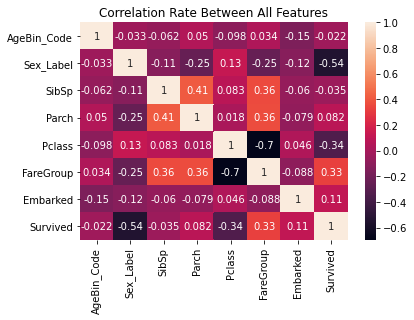

In [29]:
sns.heatmap(data_train[["AgeBin_Code","Sex_Label","SibSp","Parch","Pclass","FareGroup","Embarked", "Survived"]].corr(), annot = True)
plt.title("Correlation Rate Between All Features")
plt.show()

Here we can see very strong correlations for Sex_Label, PClass and FareGroup. With gender being the highest correlation out of all the features.

In [30]:
for data in [data_train, data_test]:
    data.drop(['Name', 'Sex','Age'], axis = 1, inplace = True)
    data.drop(['Title'], axis = 1, inplace = True)
    data.drop(['AgeGroup'], axis = 1, inplace = True)
    data.drop(['Fare'], axis = 1, inplace = True)
    data.drop(['Cabin','Ticket'], axis = 1, inplace = True)

In [31]:
data_train

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,FareGroup,Sex_Label,Title_Code,AgeBin_Code
0,1,0,3,1,0,1,0,1,3,6
1,2,1,1,1,0,2,5,0,4,4
2,3,1,3,0,0,1,1,0,2,0
3,4,1,1,1,0,1,5,0,4,0
4,5,0,3,0,0,1,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,1,2,1,0,0
887,888,1,1,0,0,1,4,0,2,6
888,889,0,3,1,2,1,3,0,2,0
889,890,1,1,0,0,2,4,1,3,0


In [32]:
data_test

,PassengerId,Pclass,SibSp,Parch,Embarked,FareGroup,Sex_Label,Title_Code,AgeBin_Code
0,892,3,0,0,3,1,1,3,0
1,893,3,1,0,1,0,0,4,4
2,894,2,0,0,3,2,1,3,3
3,895,3,0,0,1,1,1,3,0
4,896,3,1,1,1,2,0,4,6
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,0,1,1,1,3,0
414,1306,1,0,0,2,5,0,0,4
415,1307,3,0,0,1,0,1,3,4
416,1308,3,0,0,1,1,1,3,0


## Testing Our Models

In [140]:
predictors = data_train.drop(['Survived', 'PassengerId'], axis=1)
target = data_train["Survived"]
X_Train, X_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.2, random_state = 37)

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import average_precision_score

lR = LogisticRegression()
sVM = SVC()
gNB = GaussianNB()
rF = RandomForestClassifier(random_state = 55)
gBC = GradientBoostingClassifier(random_state = 56)

for model in [rF, gBC, sVM, gNB, lR]:
     print("{} using all features: (Training and Validation Error) {}".format(model.__class__.__name__, 
                                             get_classifier_cv_score(model, X_Train, y_train)))

RandomForestClassifier using all features: (Training and Validation Error) ('0.947', '0.809')
GradientBoostingClassifier using all features: (Training and Validation Error) ('0.904', '0.850')
SVC using all features: (Training and Validation Error) ('0.837', '0.814')
GaussianNB using all features: (Training and Validation Error) ('0.780', '0.761')
LogisticRegression using all features: (Training and Validation Error) ('0.818', '0.810')


In [142]:
for model in [rF, gBC, sVM, gNB, lR]:
    model.fit(X_Train, y_train)
    y_pred = model.predict(X_val)
    acc_model = round(accuracy_score(y_pred, y_val) * 100, 2)
 
    print("{} using all features: Accuracy = {}".format(model.__class__.__name__, 
                                                                             acc_model))


RandomForestClassifier using all features: Accuracy = 78.77
GradientBoostingClassifier using all features: Accuracy = 82.68
SVC using all features: Accuracy = 79.89
GaussianNB using all features: Accuracy = 81.01
LogisticRegression using all features: Accuracy = 79.89


### Grid Search For RandomForestClassifer

In [143]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 300, 500, 700],
             'max_depth' : [5, 7, 9, 11]}

grid = GridSearchCV(RandomForestClassifier(random_state=55), param_grid, scoring='average_precision',
                   cv=7, n_jobs=4, return_train_score=True)

In [144]:
grid.fit(X_Train, y_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(random_state=55), n_jobs=4,
             param_grid={'max_depth': [5, 7, 9, 11],
                         'n_estimators': [100, 300, 500, 700]},
             return_train_score=True, scoring='average_precision')

In [145]:
print_grid_search_result(grid)

{'max_depth': 7, 'n_estimators': 300}
The Train Score is  0.917
The Test Score is  0.844


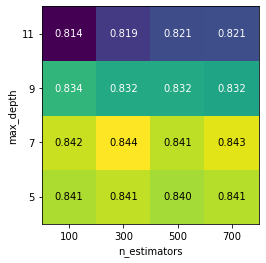

In [146]:
plot_grid_search_results(grid)

### Grid Search For GradientBoostingClassifer

In [147]:
param_grids = {'n_estimators': [25,50,100,200],
             'learning_rate' : [0.001, 0.01, 0.1, 1.0]}

grids = GridSearchCV(GradientBoostingClassifier(random_state=56), param_grids, scoring='accuracy',
                   cv=7, n_jobs=4, return_train_score=True)

In [148]:
grids.fit(X_Train, y_train)

GridSearchCV(cv=7, estimator=GradientBoostingClassifier(random_state=56),
             n_jobs=4,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [25, 50, 100, 200]},
             return_train_score=True, scoring='accuracy')

In [149]:
print_grid_search_result(grids)

{'learning_rate': 0.1, 'n_estimators': 100}
The Train Score is  0.873
The Test Score is  0.834


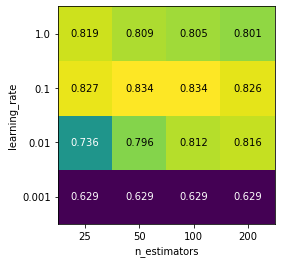

In [150]:
plot_grid_search_results(grids)

### Grid Search For SVC

In [151]:
param_SVC = {'C': [0.0001, 0.001, 0.01, 0.1],
             'gamma' : [0.1, 1.0, 10, 100]}

gridSVC = GridSearchCV(SVC(), param_SVC, scoring='average_precision',
                   cv=7, n_jobs=4, return_train_score=True)

In [152]:
gridSVC.fit(X_Train,y_train)

GridSearchCV(cv=7, estimator=SVC(), n_jobs=4,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1],
                         'gamma': [0.1, 1.0, 10, 100]},
             return_train_score=True, scoring='average_precision')

In [153]:
print_grid_search_result(gridSVC)

{'C': 0.0001, 'gamma': 1.0}
The Train Score is  0.894
The Test Score is  0.771


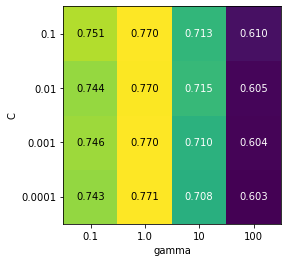

In [154]:
plot_grid_search_results(gridSVC)

In [155]:
print_grid_search_result(gridSVC)

{'C': 0.0001, 'gamma': 1.0}
The Train Score is  0.894
The Test Score is  0.771


In [156]:
y_pred_prob = cross_val_predict(RandomForestClassifier(random_state=55, max_depth =7, n_estimators = 300), X_Train, y_train, cv =7, method='predict_proba')
y_pred_prob

array([[0.89008256, 0.10991744],
       [0.89907944, 0.10092056],
       [0.90736307, 0.09263693],
       ...,
       [0.56856953, 0.43143047],
       [0.87506956, 0.12493044],
       [0.86691013, 0.13308987]])

## Precision Recall Curve

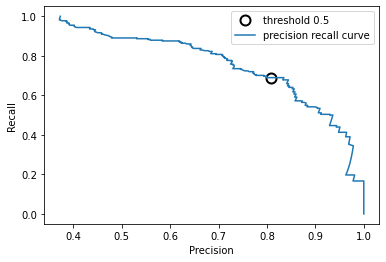

In [157]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

precision, recall, thresholds = precision_recall_curve(
    y_train, y_pred_prob[:,1])

desired_thresholds = 0.49999999
idx = np.argwhere(thresholds>desired_thresholds)[0]

#TODO: Plot precision-recall curve
plt.plot(precision[idx], recall[idx], 'o', markersize=10,
         label="threshold 0.5", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

## Retrain Our Models 

### RandomForestClassifier Retrain

In [158]:
rFD = RandomForestClassifier(max_depth=7, n_estimators=100, random_state=55)
rFD.fit(X_Train,y_train)

RandomForestClassifier(max_depth=7, random_state=55)

### Classification Report

In [159]:
from sklearn.metrics import classification_report
y_pred = rFD.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85       101
           1       0.84      0.72      0.77        78

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



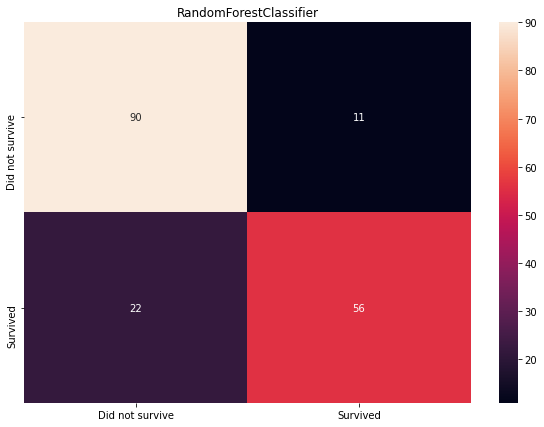

In [160]:
labels = ['Did not survive', 'Survived']
plot_confusion_matrix(y_val, y_pred, labels, title = "RandomForestClassifier")

In [161]:
desired_recall = 0.95
idx = np.argwhere(recall>desired_recall)[-1][0]
y_pred_lower_threshold = rFD.predict_proba(X_val)[:, 1] > thresholds[idx]

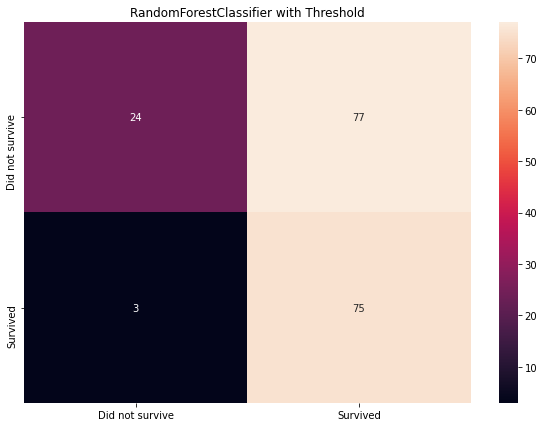

In [162]:
plot_confusion_matrix(y_val, y_pred_lower_threshold, labels, title = "RandomForestClassifier with Threshold")

### GradientBoostingClassifier Retrain

In [163]:
gBC = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 100, random_state = 123)
gBC.fit(X_Train,y_train)

GradientBoostingClassifier(random_state=123)

### Classification Report

In [164]:
y_pred = gBC.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       101
           1       0.87      0.71      0.78        78

    accuracy                           0.83       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



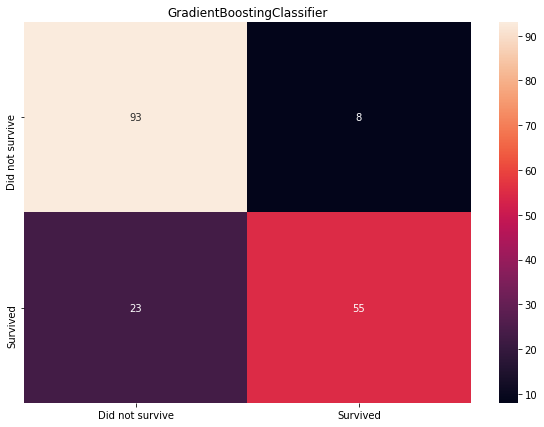

In [165]:
labels = ['Did not survive', 'Survived']
plot_confusion_matrix(y_val, y_pred, labels, title = "GradientBoostingClassifier")

### SVC Retrain|

In [166]:
sVM = SVC(C = 0.0001, gamma = 1.0)
sVM.fit(X_Train,y_train)

SVC(C=0.0001, gamma=1.0)

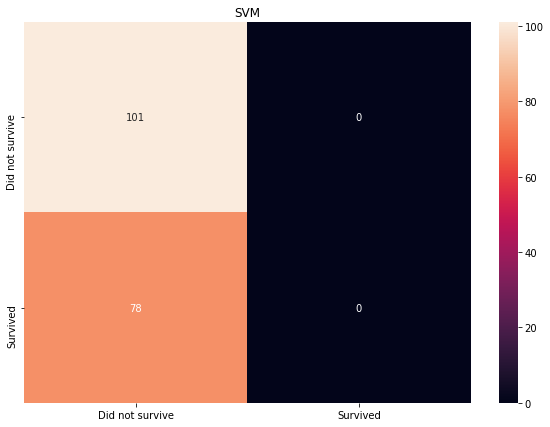

In [167]:
y_pred = sVM.predict(X_val)
labels = ['Did not survive', 'Survived']
plot_confusion_matrix(y_val, y_pred, labels, title = "SVM")

### New Accuracy with Retrained Models


In [168]:
for model in [rFD, gBC,sVM]:
    y_pred = model.predict(X_val)
    acc_model = round(accuracy_score(y_pred, y_val) * 100, 2)
 
    print("{} using all features: Accuracy = {}".format(model.__class__.__name__, 
                                                                             acc_model))


RandomForestClassifier using all features: Accuracy = 81.56
GradientBoostingClassifier using all features: Accuracy = 82.68
SVC using all features: Accuracy = 56.42


In [169]:
y_pred = gBC.predict(X_val)
acc_model = (accuracy_score(y_pred, y_val))
acc_model

0.8268156424581006

### Results for Competition

In [170]:
ids = data_test['PassengerId']
predictions = gBC.predict(data_test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)